<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-aleislasb/blob/main/Semana%208%20IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana 8: Data Analysis in Python (IBM)

5.1 Model Evaluation and Refinement

In [ ]:
#The objective is to have a certain model that works in the real world and performs in a really optimal way. 

5.2 Model Evaluation

In [ ]:
#Model Evaluation has the porpuse to have an acurrate an well developed model in order to have good estimated values. 
#This is conformed by splitting the complete data in two parts the training and testing data, this uses for example 70% of the stored data to traing the model and the other 30% to predict, our training and testing split needs to be proporcional since we do not want to have estimated values way far form what we are expecting.
#The following formula evaluates all the data set, splitting the complete data in training and test.
train_test_split() 
#The cross validation formula is used for dividing the complete dataset and then iterating each part as training and test data, in order to have each part evaluated and a better acurrance in our predicted model.

5.3 Overfitting, Underfitting and Model Selection

In [ ]:
#It is really important to know which type of behavior we are having wen a performance of data is represented, since we want to have a useful model. It is also important to consider that the noise applied to our model is part of it, we need to avoid an overfitting or underfitting, having some errors but not overfitting our model that means that it hardly will be useful. 
#A good way to know which performance is better for our model, we can calculate the r-squared, the more closer to 1, it means the more accurate it is. 

5.4 Ridge Regression

In [ ]:
#Ridge Regression prevents overfitting. In some cases when we are having polynomial or too large coefficients, on which the purspose of ridge regression is to control the magnitude of these polynomial coefficients using alpha.
#Alpha is selected before fitting or training the model. If alpha increases, the coefficients approach to zero, if it is zero we have overfitting.
#Some methods are used in order to know the value of alpha, cross validation is one of them.

5.5 Grid Search

In [ ]:
#Scans through multiple free parameters that are called hyperparameters using cross validation. Basically taked the model or object that are supposed to be trained and evaluates them with different values of hyperparameters.

Lab

In [1]:
import pandas as pd
import numpy as np

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [2]:
df = pd.read_csv(path)
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [3]:
#We define which variable is going to be the predictor.
y_data = df['price']

In [4]:
x_data=df.drop('price',axis=1)

In [5]:
#Here we split all data dividing into training and test data, adjustin testing to 10%
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [6]:
#Here we are just adjusting the test part to 40% and random state as it is specified on the exercise.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [7]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

In [8]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [9]:
#The test part is smaller than the training part.
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [10]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [21]:
#Here we are making an evaluation from all dataset to convert training and test part, evaluating each iteration, dividing all data in four parts.
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [24]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [31]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [32]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [33]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [36]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [39]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


In [ ]:
#In this exercise we evaluated a model, testing and retroalimentating our dataset, and also learned that some predicted values can be kind of far from the real point, but this means we have some noise between our predictions.

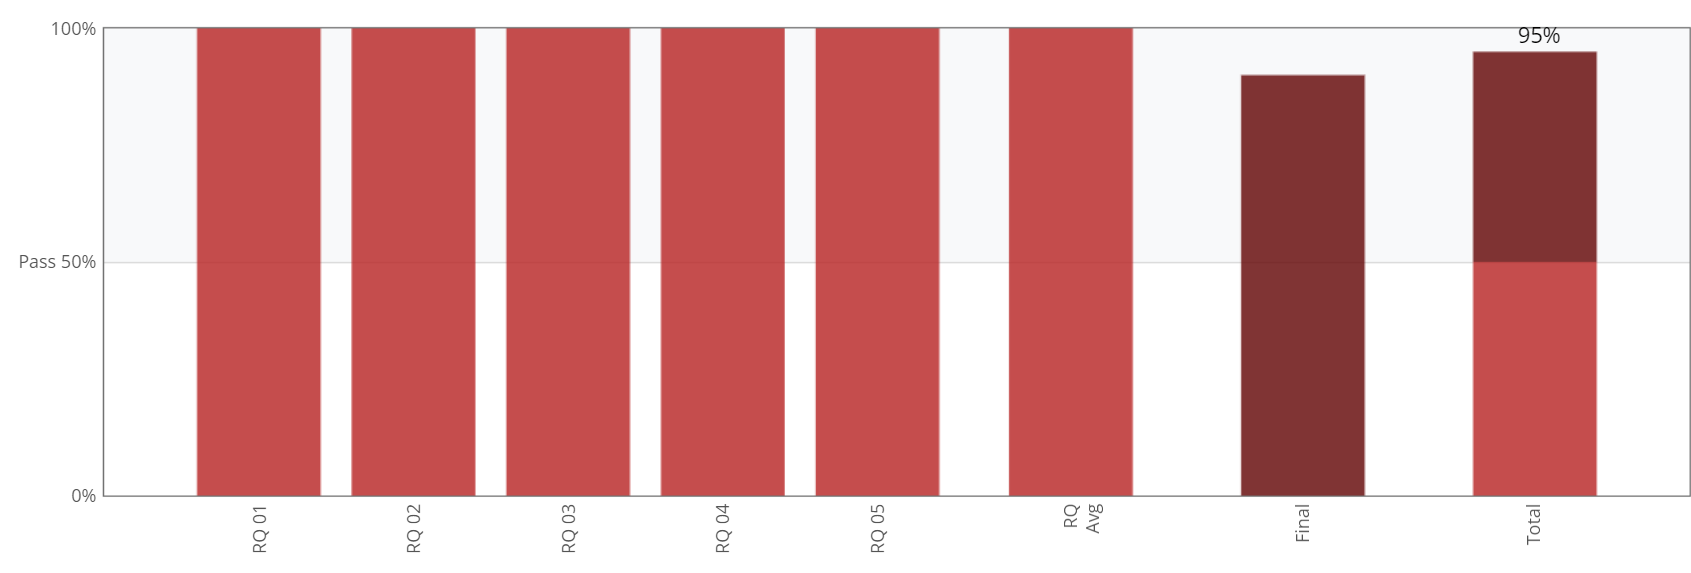